In [0]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

In [0]:
housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

In [0]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [0]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [0]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ce5b084a8>,
      dtype=object)

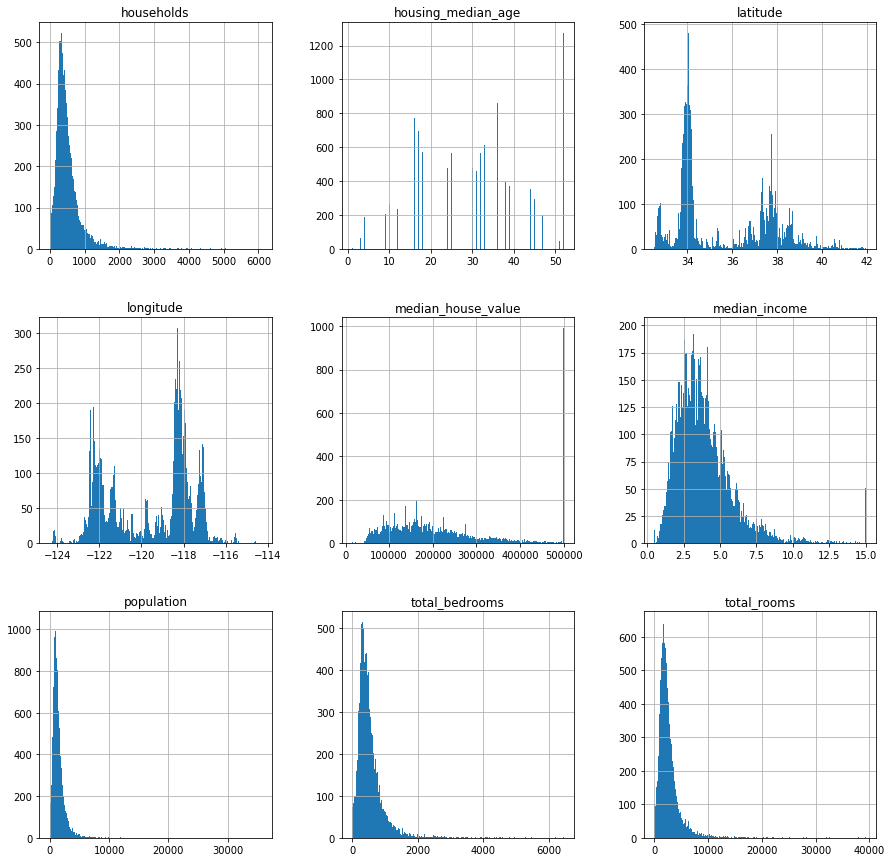

In [0]:
housing.hist(bins=500,figsize=(15,15))

In [0]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(housing,test_size = 0.2)

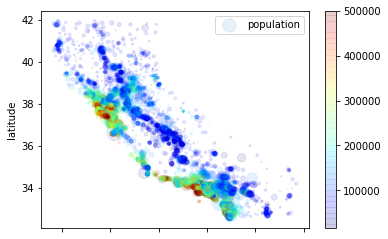

In [0]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,
            s=housing["population"]/100,label="population",
            c=housing["median_house_value"],cmap=plt.get_cmap("jet"),colorbar=True)


In [0]:
corr_housing = housing.corr()

In [0]:
from pandas.plotting import scatter_matrix

In [0]:
att = ["median_house_value","median_income","total_rooms","housing_median_age"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cd4441048>,
      dtype=object)

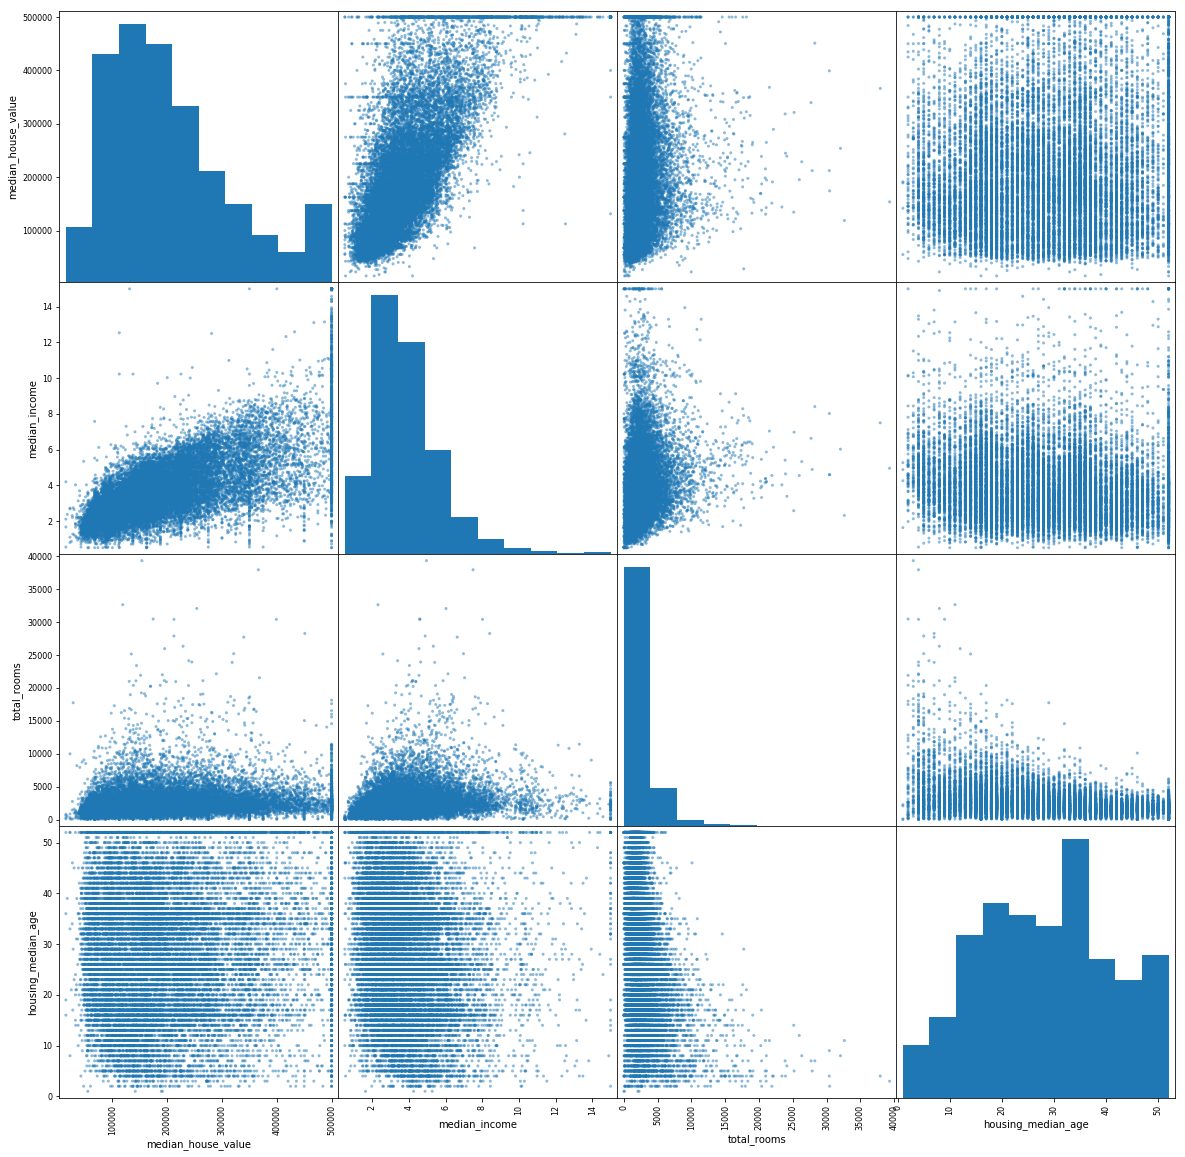

In [0]:
scatter_matrix(housing[att],figsize=(20,20))

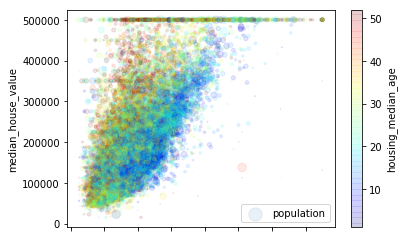

In [0]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1,
            s=housing["population"]/100,label="population",
            c="housing_median_age",cmap=plt.get_cmap("jet"),colorbar=True)

In [0]:
housing = train.drop("median_house_value",axis=1)

In [0]:
housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(),inplace=True)

In [0]:
from sklearn.preprocessing import Imputer

In [0]:
housing_num = train.drop("ocean_proximity",axis=1)

In [0]:
X=Imputer(strategy="median").fit(housing_num).transform(housing_num)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
housing_num.median().values

array([-1.1850e+02,  3.4260e+01,  2.9000e+01,  2.1250e+03,  4.3600e+02,
        1.1680e+03,  4.1000e+02,  3.5299e+00,  1.7930e+05])

In [0]:
 housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [0]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.574422,35.639107,28.643714,2641.647287,538.002846,1430.642260,500.885719,3.861638,206907.091146
std,2.003800,2.140282,12.594333,2209.907944,423.024656,1152.257662,385.808893,1.893162,115804.167274
min,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,297.000000,787.000000,280.000000,2.566100,119400.000000
50%,-118.500000,34.260000,29.000000,2125.000000,436.000000,1168.000000,410.000000,3.529900,179300.000000
75%,-118.010000,37.720000,37.000000,3150.250000,646.250000,1728.000000,607.000000,4.721600,264625.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 2106 to 6842
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16355 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

In [0]:
housing["ocean_proximity"] = label_encoder.fit_transform(housing["ocean_proximity"])

In [0]:
h = onehot_encoder.fit_transform(h.reshape(-1,1))

In [0]:
h.toarray()

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [0]:
label_binarizer = LabelBinarizer()

In [0]:
h= label_binarizer.fit_transform(housing["ocean_proximity"])

In [0]:
import numpy as np
from sklearn.base import BaseEstimator,TransformerMixin

In [0]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
  def __init__(self,att_names):
    self.att_names = att_names
  def fit(self,x,y= None):
    return self
  def transform(self,X):
    return X[self.att_names].values

In [0]:

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
          

In [0]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn.pipeline import FeatureUnion

num_att = list(housing_num)
cat_att = ["ocean_proximity"]

num_pipe = Pipeline([
    ('selector',DataFrameSelector(num_att)),
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_adder',StandardScaler()),
])

cat_pipe = Pipeline([
    ('selector',DataFrameSelector(cat_att)),
    ('label_binarizer',MyLabelBinarizer()),
])

full_pipe = FeatureUnion(transformer_list=[
    ('num_pipe',num_pipe),
    ('cat_pipe',cat_pipe),
])


In [0]:
housing_prepared = full_pipe.fit_transform(housing)

In [0]:
housing_train = train.drop("median_house_value", axis=1)
housing_train = housing_train.drop("ocean_proximity", axis=1)
housing_labels = train["median_house_value"].copy()

from sklearn.linear_model import LinearRegression

In [0]:
lin_reg = LinearRegression()

In [0]:
lin_reg.fit(housing_train,housing_labels)

In [0]:
housing_test= test.drop("ocean_proximity", axis=1)
housing_test = housing_test.drop("median_house_value", axis=1)

In [0]:
prediction = lin_reg.predict(housing_test)

In [0]:
housing_test["median_house_value"] = prediction

In [0]:
test

In [0]:
housing_test

In [0]:
some_data = housing_train.iloc[:5]
some_labels = housing_labels.iloc[:5]
#some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data))
print("Labels:\t\t", list(some_labels))


Predictions:	 [ 42362.91283647 248723.64748528 211219.98147166 222742.11264422
 126560.90602975]
Labels:		 [71300.0, 274400.0, 307400.0, 171300.0, 138800.0]


In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
housing_predictions = lin_reg.predict(housing_train)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69192.68754866024

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
tree = DecisionTreeRegressor()

housing_labels = housing["median_house_value"].copy()
housing_data = housing.drop("median_house_value", axis=1)

tree.fit(housing_data,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
housing_tree_predictions  = tree.predict(housing_data)
tree_mse=mean_squared_error(housing_labels,housing_tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
scores = cross_val_score(tree,housing_data,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse = np.sqrt(-scores)

In [0]:
rmse.mean()

91981.96574554556

In [0]:
scores = cross_val_score(lin_reg,housing_data,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse2= np.sqrt(-scores)

In [0]:
rmse2.mean()

70651.33935835703

In [0]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [0]:
scores = cross_val_score(forest_reg,housing_data,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse3= np.sqrt(-scores)

In [0]:
rmse3.mean()

72003.24958104893

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(forest_reg, param_grid,cv = 5,scoring='neg_mean_squared_error')
grid_search.fit(housing_data,housing_labels)